In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
def get_data(stock):
    stockdata = pd.read_csv("{stock}.csv".format(stock = stock))
    stockdata['date'] = pd.to_datetime(stockdata['date']).dt.date
    stockdata.sort_values('date', inplace= True)
    del stockdata['Unnamed: 0']
    return stockdata

google = get_data('GOOGL')
apple = get_data('AAPL')
amazon = get_data('AMZN')
netflix = get_data('NFLX')
google['company_name'] = 'GOOGL'
apple['company_name'] = 'AAPL'
amazon['company_name'] = 'AMZN'
netflix['company_name'] = 'NFLX'

In [4]:
stocks = pd.DataFrame()
stocks = pd.concat([google, apple, amazon, netflix])

/var/folders/x5/l8x4kr756xq3xt39yzgv1_b80000gn/T/ipykernel_29718/773932796.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot_date(company['date'], company['close'], 'b-', color = 'purple')


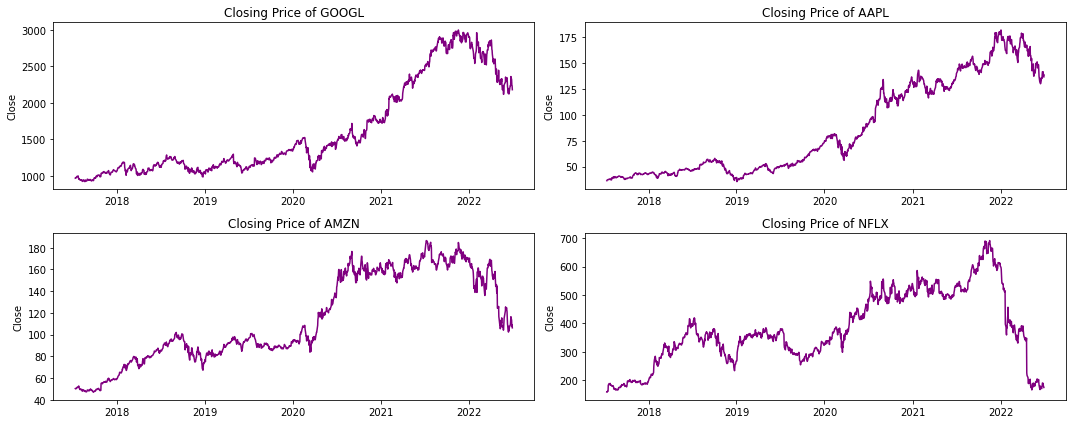

In [5]:
company_list = [google, apple, amazon, netflix]
tech_list = ['GOOGL', 'AAPL', 'AMZN', 'NFLX']
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot_date(company['date'], company['close'], 'b-', color = 'purple')
    plt.ylabel('Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

As we can see, most stocks rise throughout time as they keep growing. Netflix has been collapsing after a price fix. Also, users of Netflix have been shifting to its competitors: Hulu, Amazon Prime Video,...

/var/folders/x5/l8x4kr756xq3xt39yzgv1_b80000gn/T/ipykernel_29718/1119660400.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot_date(company['date'], company['volume'], 'b-', color = 'purple')


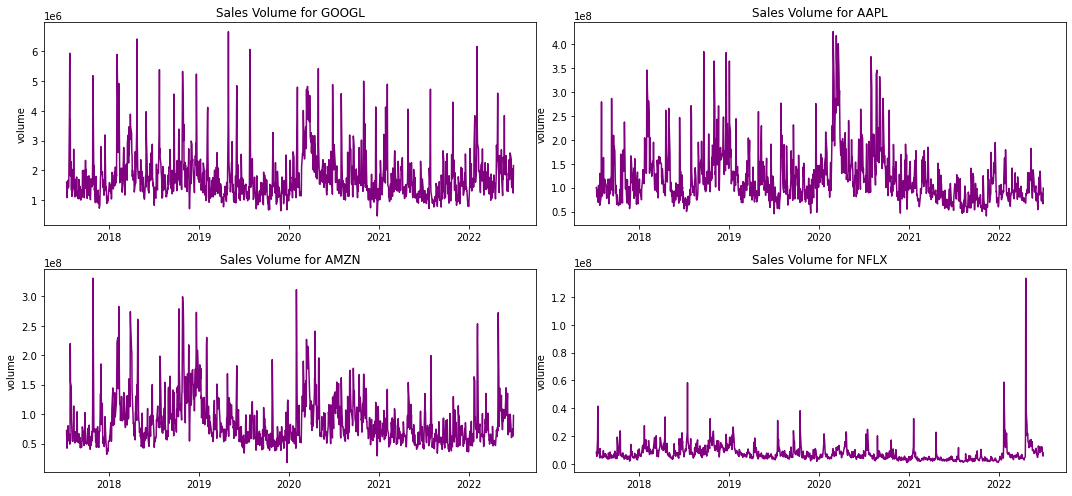

In [6]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot_date(company['date'], company['volume'], 'b-', color = 'purple')
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

We can see the highest fluctuation in sales volume occur to netflix around March 2022. 

Moving on, we will see the moving average of each stock historically from 2018 to 2022. Moving average can calculate the overall trend in our dataset. In our case, we will see the moving average of 10 days, 20 days, and 50 days

/var/folders/x5/l8x4kr756xq3xt39yzgv1_b80000gn/T/ipykernel_29718/2785797732.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot_date(company['date'], company['close'], 'b-', color = 'purple', linewidth = 5)
/var/folders/x5/l8x4kr756xq3xt39yzgv1_b80000gn/T/ipykernel_29718/2785797732.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot_date(company['date'], company['MA 10 days'], 'b-', color = 'green', linewidth = 5)
/var/folders/x5/l8x4kr756xq3xt39yzgv1_b80000gn/T/ipykernel_29718/2785797732.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot_date(company['date'], company['MA 20 days'], 'b-', color = 'orange', linewidth = 5)
/

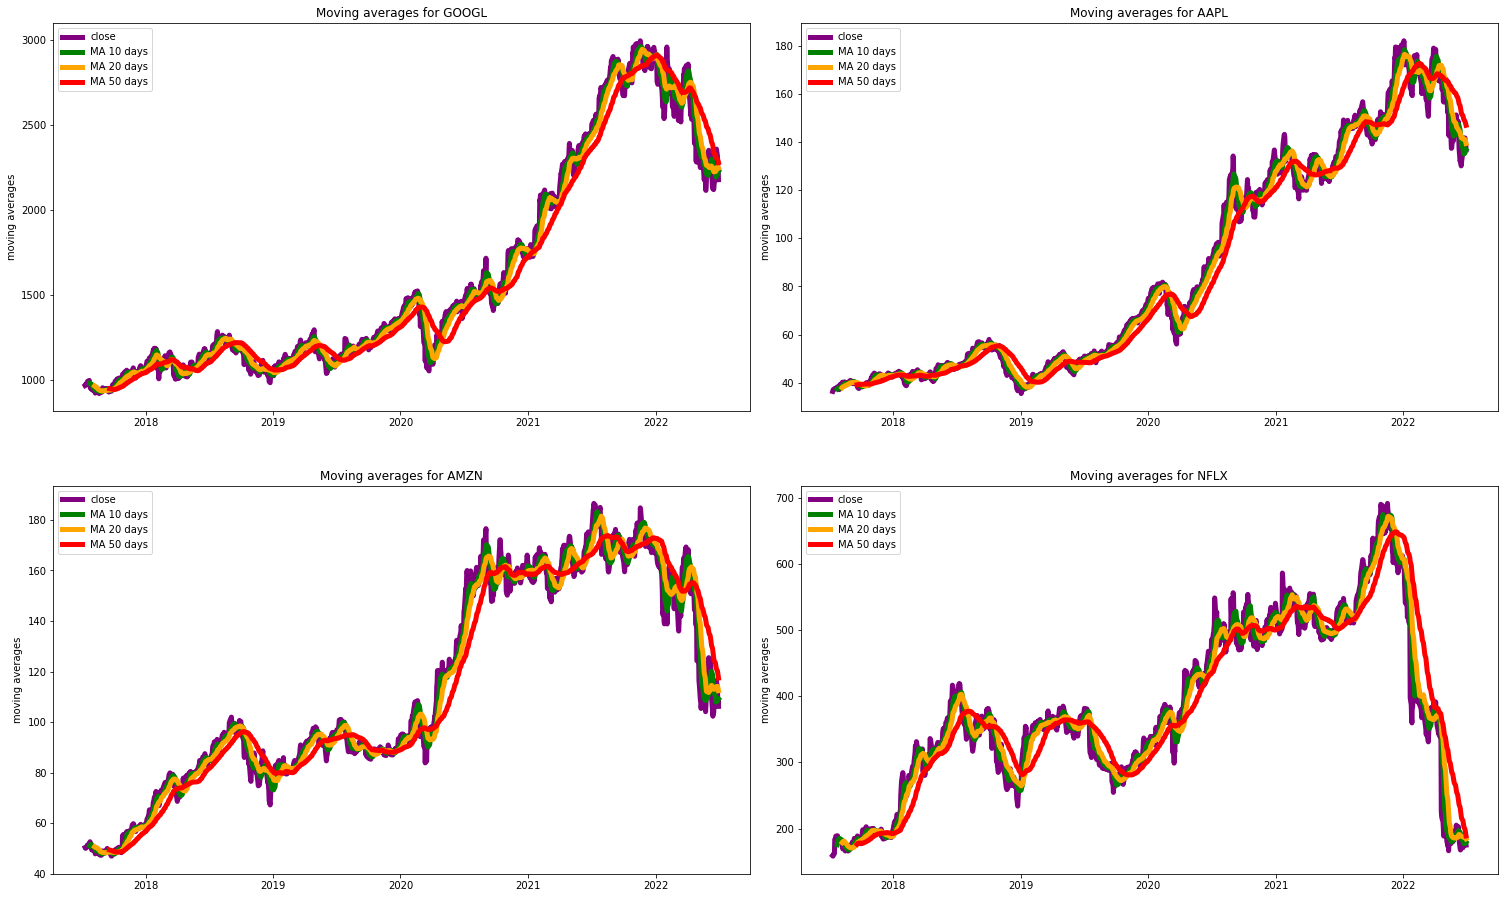

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()

plt.figure(figsize=(21, 13))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot_date(company['date'], company['close'], 'b-', color = 'purple', linewidth = 5)
    plt.plot_date(company['date'], company['MA 10 days'], 'b-', color = 'green', linewidth = 5)
    plt.plot_date(company['date'], company['MA 20 days'], 'b-', color = 'orange', linewidth = 5)
    plt.plot_date(company['date'], company['MA 50 days'], 'b-', color = 'red', linewidth = 5)
    plt.ylabel('moving averages')
    plt.xlabel(None)
    plt.legend(['close','MA 10 days', 'MA 20 days', 'MA 50 days'])
    plt.title(f"Moving averages for {tech_list[i - 1]}")
    
plt.tight_layout()

Overall, the moving averages of each stock follow closely the "close" price. There is some slight differences in the moving average of 50 days. This is obvious because in 50 days, price can be more generalized. With moving average, we can reduce the short term fluctuations to better see the flow of the time series data.

Moving on, we will analyze the correlations between stocks

In [8]:
techs = pd.DataFrame()
techs['GOOGLclose'] = google['close']
techs['AAPLclose'] = apple['close']
techs['AMZNclose'] = amazon['close']
techs['NFLXclose'] = netflix['close']

We will calculate the percentage change, which is daily return on each stock. The daily return is the comparison between today's close price and yesterday's close price. Daily return helps measure day-to-day stock performances.

In [9]:
tech_rets = techs.pct_change()
tech_rets.head()

,GOOGLclose,AAPLclose,AMZNclose,NFLXclose
1251,NaN,NaN,NaN,NaN
1250,0.001230,0.013929,-0.005842,-0.003402
1249,0.008319,0.008594,0.001179,0.018393
1248,-0.000972,0.003489,0.008215,0.003600
1247,0.011261,0.003477,0.014267,0.135436


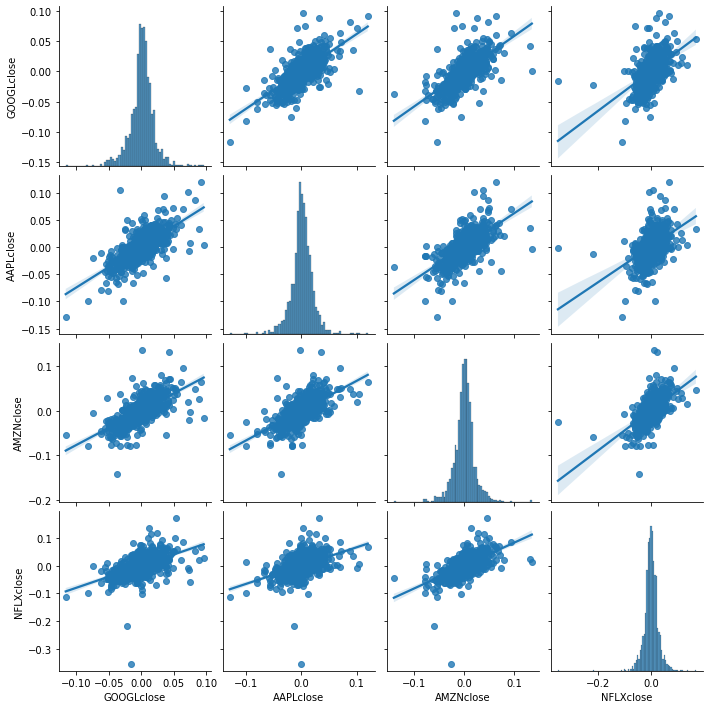

In [10]:
sns.pairplot(tech_rets, kind='reg')

An interesting insight to the scatterplot matrix above is that all stocks tend to positively correlate with the other. Perhaps, that is why they are called FAANG. They are the biggest influences to the modern world. Without one another, they would definitely lose its values. For example, without Google, people may not find out about Netflix. Or without Amazon, people may not find out about Apple products. 

<AxesSubplot:>

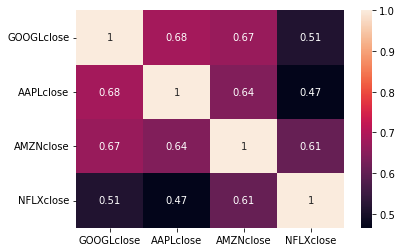

In [12]:
sns.heatmap(tech_rets.corr(), annot=True)

The correlation coeffients confirm that we do have a strong and positive relationships between the stocks. The weakest daily return correlation in our case is Netflix and Apple with a correlation coefficient of 0.47

<AxesSubplot:>

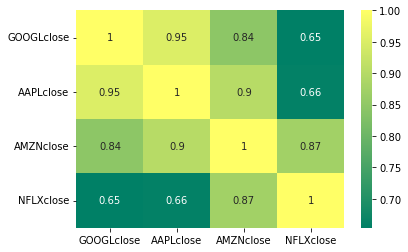

In [13]:
sns.heatmap(techs.corr(), annot=True, cmap='summer')